# Anomaly Detection systems
## 1. Problem Statement
Given a dataset $x^{(1)}, x^{(2)},.., x^{(m)}$, Anomaly detection is a machine learning algorithm capable of detecting examples that significantly differ from the ***normal*** examples. Fraud detection, manufacturing, data centers monotiring are few examples among the applications of such algorithms. \
The main idea is to devise a function $p(x)$ where $x$ is a vector of features considered. The classification would be as follows:
$\begin{aligned}
classification = \begin{equation}
    \begin{cases}
      anomaly , ~ p(x) \leq \epsilon_1 \\
      normal , ~ otherwise
    \end{cases}
\end{equation}
\end{aligned}$
where $\epsilon_1$ is the upper bound (for normal classification) and $\epsilon_2$ is the lower bound.


## 2. Density Estimation
### 2.1 Gaussian Normal Distribution
A random variable $X$ is nomrally distributed with mean $\mu$ and standard deviation $\sigma$, alsot denoted as $X$ ~ $N(\mu, \sigma ^ 2)$ when the density function of $X$ satisfies the following equation:
$\begin{aligned}
f_X(t) = \frac{1}{\sqrt{2 \pi} \sigma} \cdot exp (- \frac{(t - \mu)^ 2}{2\sigma ^ 2})
\end{aligned}$  
where $\mu$ is $E(X)$ also referred to as the mean, or the expected value, and $\sigma^2$ is $Var(X)$ which is the variance. The following two plots represent the effect of changing the value of $\mu$ and $\sigma$

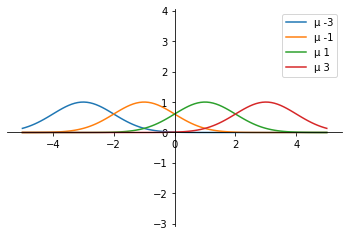

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# 100 linearly spaced numbers
x = np.linspace(-5, 5, 100)

fig, ax = plt.subplots()

sigma_squared = 1
for mu in [-3, -1, 1, 3]:
    y = np.exp(- ((x-mu) ** 2)/ (2 * sigma_squared))
    ax.plot(x, y, label='\u03BC' + " " + str(mu))

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.axis('equal')
leg = ax.legend();

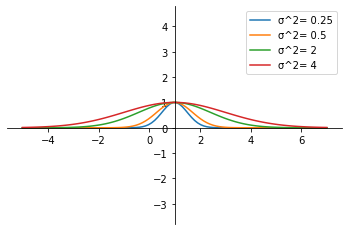

In [10]:
# 100 linearly spaced numbers
x = np.linspace(-5, 7, 100)

fig, ax = plt.subplots()

mu = 1
for sigma_squared in [0.25, 0.5, 2, 4]:
    y = np.exp(- ((x-mu) ** 2)/ (2 * sigma_squared))
    ax.plot(x, y, label='\u03C3' + "^2= " + str(sigma_squared))

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.axis('equal')
leg = ax.legend();

### 2.2 Mathematical properties of Gaussian distribution
The [Central limit theorem](https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_probability/BS704_Probability12.html#:~:text=The%20central%20limit%20theorem%20states,will%20be%20approximately%20normally%20distributed.) makes the Gaussian distribution an extremely powerful tool in probability theory and statistics. Given a sample data $x^{(1)}, x^{(2)},... x^{(m)}$ with $m$ large enough $X$ can be modeled as a gaussian distribution with 
$\begin{aligned} \begin{equation}
    \begin{cases}
        \mu = \frac{1}{m} \sum_{i=1}^{m} x^{(i)} \\
        \sigma ^ 2= \frac{1}{m - 1} \sum_{i=1}^{m} (x^{(i)} - \mu) ^ 2
    \end{cases}
\end{equation} \end{aligned}$
The fraction $\frac{1}{m-1}$ is chosen so that $\frac{1}{m - 1} \sum_{i=1}^{m} (x^{(i)} - \mu) ^ 2$ is an unbiased estimator. On practice, it might be replaced with $\frac{1}{m}$

### 2.3 Final form
Consider a features vector $x^{(i)} \in \mathbb{R} ^ {n}$ and a dataset $x^{(1)}, x^{(2)},... x^{(m)}$. We can assume each of the features as an independent random variable $X_j$ and given $m$ large enough, the following assumption holds:
$\begin{aligned} 
X_j \sim N(\mu_j, \sigma_j ^ 2)
\end{aligned}$
Where $\mu_j = \frac{1}{m} \sum_{i=1}^{m} x^{(i)}_j $ and $\sigma_j ^ 2  = \frac{1}{m - 1} \sum_{i=1}^{m} (x^{(i)}_j - \mu_j) ^ 2$
Given these two assumptions, We can devise the density function of the vector $\vec{x}$

$\begin{aligned}
P(\vec{x}) = \prod_{i=1}^{n} P(x_j, \mu_j, \sigma^2_j)
\end{aligned}$

## 3. Building an Anomaly Detection System
### 3.1 training data
Assuming we have $m$ normal (non-anamolous) samples and $k$ anamolous samples, where $m$ is significantly larger than $n$. The recommended approach is as follows:
* consider $\frac{m}{2}$ non-anamolous samples to devise the density function.
* consider $\frac{m}{4}$ non-anamolous samples and $\frac{n}{2}$ anamolous samples as cross validation set
* consider the rest of the samples (both types) as a test set.

The parameter tuning, should be based on the results of the cross validation set. It is crucial to consider the skewed nature of the data during the performace evaluation.
### 3.2 Features choice
To improve the algorithm's performance, it is preferrable to have the training data distribution as close to the normal distribution as possible. Therefore, certain transformation might reveal necessary, applying logarithmic or polynomial would possibly reshape the data's distribution.\
Additionally, the density function $p(\vec x)$ should output large values for normal examples, and small ones for anomalous examples. Performance-wise, the most challenging problem is having $p(\vec x)$ comparable for both positive and negative examples. The recommended approach is to consider the anomalous and devise a certain feature that reflects the anomaly. 


## 4. Anomaly Detection VS Supervised Learning
Due to the nature of data, the supervised learning might represent itself as a potential solution for our use-case. Yet, there are certain circumstances that determine which 
1. Anomaly Detection
* very small number of positive examples (anomolous samples)
* significanly larger number of negative examples
* many types of anomalies that are hard to learn out of the low number of positive examples
* future anomalies might be significanlty different from the ones presented in the dataset
* fraud detection, manufacturing, monotoring machines in data centers

2. Supervised Learning
* Large number of both positive and negative examples
* enough positive examples to successfully predict future anomalies
* Email spam classification, weather prediction, diseases classification

## 5. Extending the Anomaly Detection
### 5.1 The basic model limitations
Even though the initial model reaches an acceptable efficiency, it might fail to detect certain anomalous correlations between different features. Alternatively, let's assume that a normal range(considered seperately) for $x_1$ is $R_1 = [a_1, b_1]$ while the $x_2$'s normal range is $R_2 = [a_2, b_2]$. Additionally, a features analysis would reach the conclusion that these two features grow linearly with each other. The density function 
$\begin{aligned}
P(\vec{x}) = \prod_{i=1}^{n} P(x_j, \mu_j, \sigma^2_j)\end{aligned}$ is likely to detect $x_1 \notin R_1$ or $x_2 \notin R_2$. Yet, it might fall short to detect anomalous non-linear growth of both features. Hence the use of the multivariate density function.

### 5.2 The multivariate Gaussian distribution.
Having $\vec{X} = (x_1, x_2, ... x_n)$ where $x_j \sim N(\mu_j, \sigma_j ^ 2)$. The multivariate Guassian density function would be:
$\begin{aligned}
f(\vec{X}) = \frac{1}{\sqrt{2\pi}^n \sqrt{det \Sigma}} exp(-\frac{1}{2}(\vec{X} - \mu)^T \Sigma^{-1}(\vec{X} - \mu))
\end{aligned}$
where $\mu$ = 
$\begin{bmatrix} \mu_1 \\ \mu_2 \\ .. \\ .. \\ \mu_n
\end{bmatrix}$ and 
$\Sigma$ is covariance matrix 
$\begin{bmatrix} cov(x_1, x_1) && cov(x_1, x_2) && .. && cov(x_1, x_n) \\
cov(x_2, x_1) && cov(x_2, x_2) && .. && cov(x_2, x_n) \\
.. && .. && .. && .. && \\
cov(x_n, x_1) && cov(x_n, x_2) && .. && cov(x_n, x_n) \\
\end{bmatrix}$ reflecting the different correlations between features.
Given a dataset $(x^{(1)}, x^{(2)},...,x^{(n)})$ the parametes $\mu$ and $\Sigma$ can be estimated as follows:
$\begin{aligned} \begin{equation}
    \begin{cases}
        \mu = \frac{1}{m} \sum_{i=1}^{m} x^{(i)} \\
        \sigma ^ 2= \frac{1}{m} \sum_{i=1}^{m} (x^{(i)} - \mu)(x^{(i)} - \mu)^{T}
    \end{cases}
\end{equation} \end{aligned}$

### 5.3 Relation between basic and multivariate models
It is possible to mathematically prove that original model is a subclass of the multivariate one. More formally, the first model is the same as the second one for 
$\Sigma = \begin{bmatrix} \sigma_1^2 && 00 && 00 && .. && 00 \\ 
00 && \sigma_2^2 && 00 && .. && 00\\
00 && 00 && \sigma_3^2 && 00 && 00 \\
.. && .. && .. && .. && ..\\
00 && 00 && 00 && 00 && \sigma_n^2
\end{bmatrix}$
To choose which of the models to use, certain considerations should be taken into account
1. Basic model
* requires manually devising more complex features that reflect correlation between features
* computationally cheaper: scalles bettwe with large values of $n$
* performs relatively well for small training datasets
2. Multivariate model
* automatically captures correlations
* computationally more expensive, as the matrix inverse operation can be estimated as $O(n^3)$ 
* requires a large number of training samples $m$ is significantly larger than $n$

### 5.4 Technical Notes
In case the covariance matrix is not invertible, there are two main possible reasons:
1. $m < n$, $\Sigma$ is a symmetric $n * n$ matrix. Thus, it has $\frac{n ^ 2}{2}$ variables which requires a large number of samples.
2. certain features $x_j$ are redundant, or more formally, the vectors $x_i$ are not linearly independent.